In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from BuildingMicrograd import Value
from Visualize import draw_dot

In [3]:
# Value addition
a = Value(2.0)
b = Value(-3.0)
a + b

Value(data=-1.0)

In [4]:
# Value multiplication
c = Value(4)
d = Value (5)
c*d

Value(data=20)

In [5]:
# Value multiplication and Value addition
# (a.__mul__(c)).__add__(d)
c*a + d

Value(data=13.0)

In [6]:
# _previous addition
g = a + d
g._previous

{Value(data=2.0), Value(data=5)}

In [7]:
# _previous multiplication
h = a * d
h._previous

{Value(data=2.0), Value(data=5)}

In [8]:
# _operation
h = a * d
h._operation

'*'

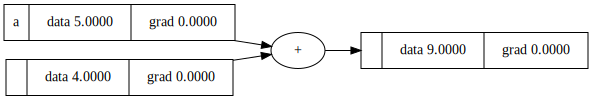

In [9]:
# draw_dot
a = Value(5, label='a')
b = Value(4)

d = a + b


draw_dot(d)

In [10]:
a = Value(2.0, label='a')
b = Value(-3, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

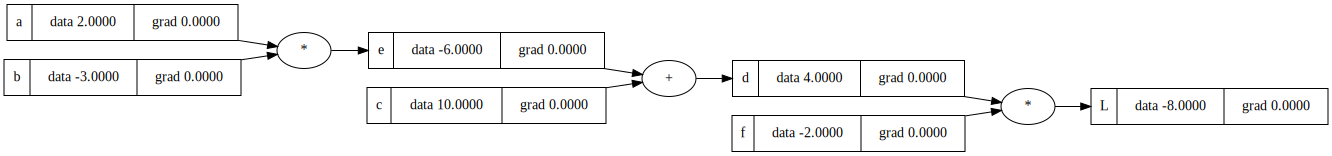

In [11]:
draw_dot(L)

### Neuron Example

We can use tanh as the activation function of our neuron.

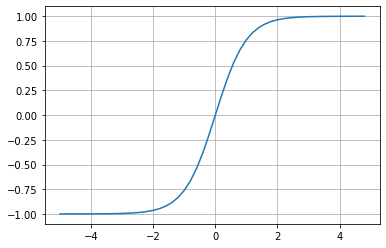

In [12]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [13]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
# mirror the synaptic strength for the input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
output = n.tanh(); output.label = 'output'

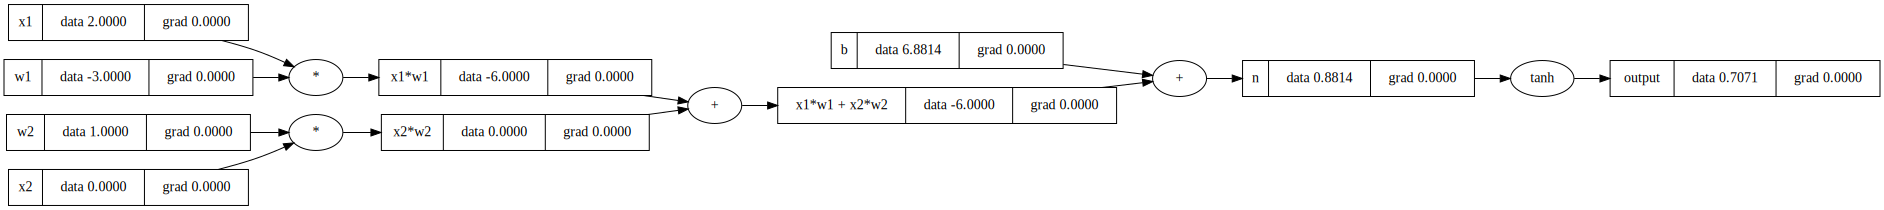

In [14]:
draw_dot(output)

In [15]:
output.backward()

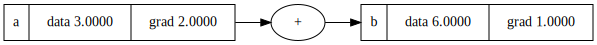

In [16]:
# Fixing bug: When adding the same value to itself, the gradient has to accumulate
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

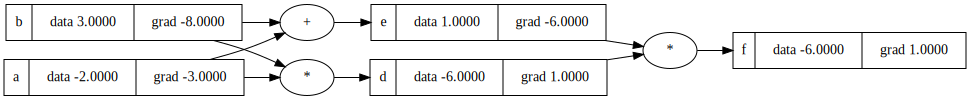

In [17]:
# Fixing bug: When adding the same value to itself, the gradient has to accumulate
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)